In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from PIL import Image

from collections import defaultdict
import json

plt.rcParams['figure.figsize'] = (15, 15)

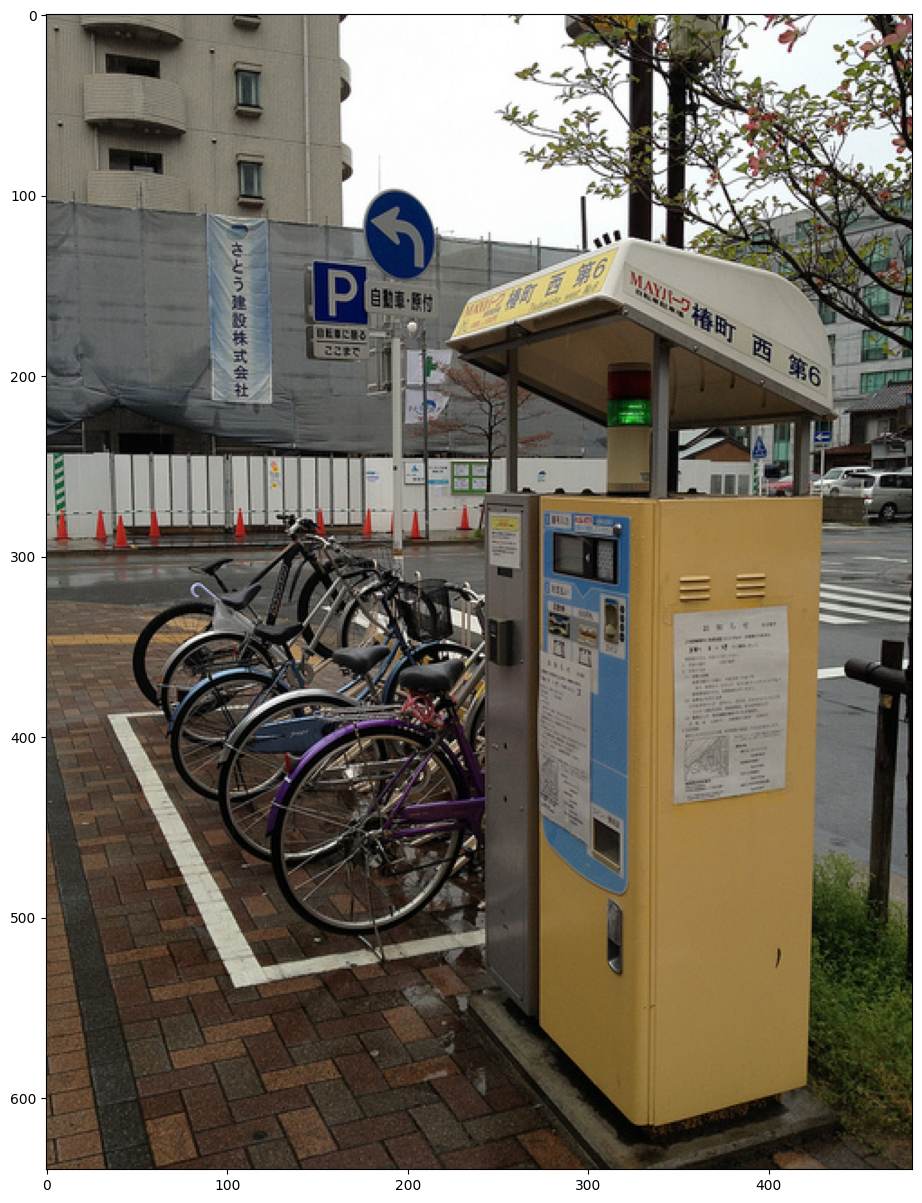

In [2]:
# Show Image
#430122
image_name = "./train2017/000000196610.jpg"

img = Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

In [3]:
# Get annotations for image
image_ids_annotations = defaultdict(list)

# Load annotations
path = './annotations/instances_train2017.json'
file = open(path)
anns = json.load(file)

# Add into datastructure
for ann in anns['annotations']:
    image_id = ann['image_id']
    image_ids_annotations[image_id].append(ann)

In [4]:
# Get mapping category_id to category name
category_id_to_name = dict()
for ann in anns['categories']:
    category_id_to_name[ann['id']] = ann['name']

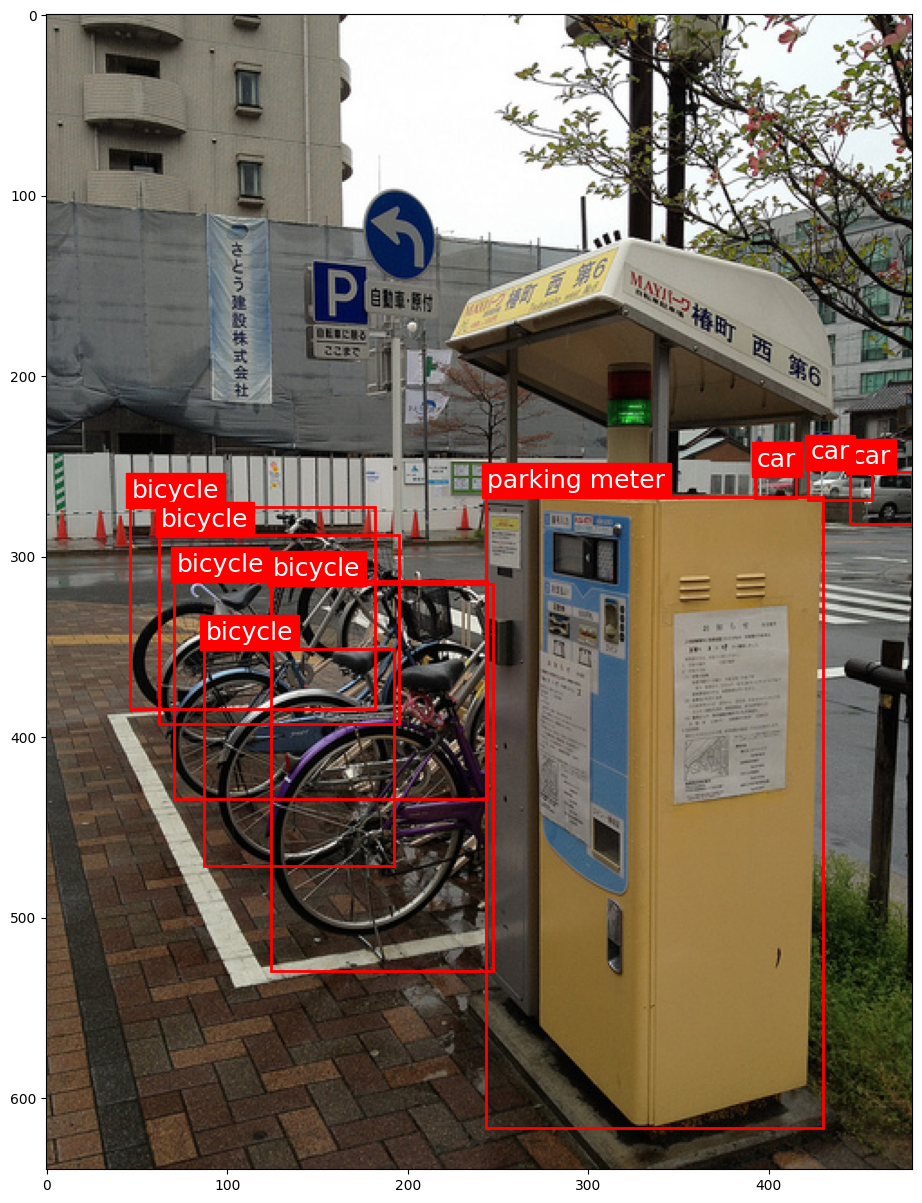

<Figure size 1500x1500 with 0 Axes>

In [9]:
# Select one image and show annotations
#196610
image_name = "./train2017/000000196610.jpg"
image_id = int(image_name.split("/")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

# Visualize boxes and labels
image_anns = image_ids_annotations[image_id]

# Get all bounding boxes and labels
for image_ann in image_anns:
    bbox = image_ann['bbox']
    name = category_id_to_name[image_ann['category_id']]

    # bbox coordinates
    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    # Add text and bbox
    plt.text(x+1, y-5, name, fontdict={'fontsize': 18.0, 'fontweight':'medium', 'color':'white', 'backgroundcolor':'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(bb)

ax.imshow(img)
plt.show()
output_path = "./output.jpg"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0)